# 2.2 Steady State Analysis - The phasor method

## 2.2.1 Real frequencies and Imaginary frequencies

We learned that when $s$ is a real number it describes an exponential wave with frequency in [Np/s]  
  
We also learned that when $s$ is an imaginary number it describes a sin/cos wave with frequency in [rad/s]  
  
We learned that the time domain expression $Ae^{-at}$ transforms to $\frac{A}{s+a}$ in the frequency domain  
  
So how do we transform sin/cos waves to the frquency domain?  
It's very easy, just look it up in the Laplace transform table  
  
The table is repeated here for convenience  
![image1!](./images_s2/image_2_2_1.png)  

## 2.2.2 Transforming sin/cos into the frequency domain

Our general equation for a single-sided sin/cos wave is  
  
$$sin/cos\;wave\equiv f(t)=\frac{A}{2}e^{st}+\frac{A^*}{2}e^{s^*t}$$  
where $A$ is a phasor, or complex number, which describes the magnitude and phase of the sin/cos wave  
and $s$ is an imaginary frequency in [rad/s]  
  
In order to transform the equation to the frequency domain, we must pick a specific frequency for $s$  
In this case, $s=j\omega$.  To match this with the table, $a=j\omega$  
The Laplace transform comes right from the table  
  

$$\mathcal{L}\left\{\frac{A}{2}e^{j\omega t}+\frac{A^*}{2}e^{-j\omega t}\right\}=\frac{\frac{A}{2}}{s-j\omega}+\frac{\frac{A^*}{2}}{s+j\omega}$$  
It doesn't matter if $A$ and $a$ are real, imaginary, or complex numbers,  
they are numbers and the transform works just the same  
  
It is always easier to leave the Laplace transform in the form you see above  
so that is what we will do for Fundamentals of Linear Systems  
  
Most people people like to write the trigonometric form of sin or cos  
For cos, the phasor $A$ is a real number pointing to the right on the real axis  
The phasor is $A_m\;\angle0^\circ$, or simply $A_m$ is a real number   

  
$$\mathcal{L}\left\{A_mcos(\omega t)\right\}=\frac{\frac{A_m}{2}}{s-j\omega}+\frac{\frac{A_m}{2}}{s+j\omega}$$  
make a common denominator  
$$\mathcal{L}\left\{A_mcos(\omega t)\right\}=\frac{\frac{A_m(s+j\omega)}{2}}{(s-j\omega)(s+j\omega)}+\frac{\frac{A_m(s-j\omega)}{2}}{(s+j\omega)(s-j\omega)}$$  
add the terms and simplify  
$$\mathcal{L}\left\{A_mcos(\omega t)\right\}=\frac{A_ms}{s^2+\omega^2}$$  
  
For sin, the phasor $A$ is an imaginary number pointing down on the negative imaginary axis  
A sin wave is phase shifted by $-90^\circ$ from cos. The phasor is $A_m\;\angle-90^\circ$  
In this case, $A=-A_mj$ and $A^*=A_mj$  
  
$$\mathcal{L}\left\{A_msin(\omega t)\right\}=\frac{\frac{-A_mj}{2}}{s-j\omega}+\frac{\frac{A_mj}{2}}{s+j\omega}$$  
make a common denominator  
$$\mathcal{L}\left\{A_msin(\omega t)\right\}=\frac{\frac{-A_mj(s+j\omega)}{2}}{(s-j\omega)(s+j\omega)}+\frac{\frac{A_mj(s-j\omega)}{2}}{(s+j\omega)(s-j\omega)}$$  
add the terms and simplify  
$$\mathcal{L}\left\{A_msin(\omega t)\right\}=\frac{A_m\omega}{s^2+\omega^2}$$  
  
That the Laplace transform of the trigonometric form of sin/cos,  
however, it's easier to use the exponential form of sin/cos rather the trigonometric form  

## 2.2.3 Drive a physical system with a sin/cos wave

Now that we can Transform sin/cos to the frequency domain  
we can use a sin/cos wave as an input to a physical system  
  
Let's try it with a parallel R-C circuit  
Thedrawing show the parallel R-C circuit and the transfer function  
![image2!](./images_s2/image_2_2_2.png)  

To solve for the voltage V, we will use the equation for the transfer function  
  
$$V(s)=H(s)I(s)$$  
substitute the physical transfer function and the Laplace transform of the input signal to get  
  
$$V(s)=\left[\frac{\frac{1}{C}}{s+\frac{1}{RC}}\right]\cdot\left[\frac{\frac{A}{2}}{s-a}+\frac{\frac{A^*}{2}}{s+a}\right]$$

Let's give the system some real numbers:  
  
assume the system has a time constant of 200ms, with R=20$k\Omega$ and C=10$\mu F$  
that means the system has a natural frequency of 5 [Np/s]  
assume the input is a sin wave with a magnitude of 5mA, making $A=-0.005j$ and $A^*=0.005j$  
assume the frequency is 100 [rad/s], so that $a=100j$  
  
substitute the values, to get  
  
$$V(s)=\left[\frac{100k}{s+5}\right]\cdot\left[\frac{-j2.5m}{s-j100}+\frac{j2.5m}{s+j100}\right]$$  
multiply this out to get  
  
$$V(s)=\left[\frac{-j250}{(s+5)(s-j100)}+\frac{j250}{(s+5)(s+j100)}\right]$$  
make a common denominator  
  
$$V(s)=\left[\frac{-j250\cdot(s+j100)+j250\cdot(s-j100)}{(s+5)(s-j100)(s+j100)}\right]$$  
simplify  
  
$$V(s)=\left[\frac{50k}{(s+5)(s-j100)(s+j100)}\right]$$  
when the denominator is multiplied out, we get  
  
$$V(s)=\frac{50k}{s^3+5s^2+10,000s+50,000}$$  
However, we want to find the residues of the form  
  
$$V(s)=\frac{R_0}{s+5}+\frac{R_1}{s-100j}+\frac{R_2}{s+100j}$$  
use python to find the residues  

In [1]:
import scipy.signal as sig

num = [50000]
den = [1, 5, 10000, 50000]
r, p, k = sig.residue(num, den)
print('residues =', r)
print('poles =', p)
print('k =', k) # make sure k is empty

residues = [ 4.98753117+0.j         -2.49376559-0.12468828j -2.49376559+0.12468828j]
poles = [-5.0000000e+00  +0.j  8.8817842e-16+100.j  8.8817842e-16-100.j]
k = []


There is some rounding error, but you can see the poles are at -5 [Np/s], 100j [rad/s], and -100j [rad/s]  
It's import to observe the order, to get the correct order for the residues  
We see  
  
$$V(s)=\frac{5}{s+5}+\frac{-2.5-0.125j}{s-100j}+\frac{-2.5+0.125j}{s+100j}$$  
It's really easy to transform this back into the time domain  
  
$$V(t)=5e^{-5t}+(-2.5-0.125j)e^{j100t}+(-2.5+0.125j)e^{-j100t}$$  
The response is made up of the natural response, which matches the natural frequency of -5 [Np/s]  
and a forced reponse which is the sin/cos wave made up of the two imaginary exponentials at $\pm$100 [rad/s]  
  
Use python to plot the response

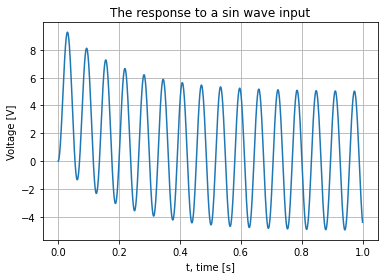

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1.0, 1000) # choose a time array to last for one second
V_t = r[0]*np.exp(p[0]*t) + r[1]*np.exp(p[1]*t) + r[2]*np.exp(p[2]*t) 
plt.plot(t, V_t.real)
plt.xlabel('t, time [s]')
plt.ylabel('Voltage [V]')
plt.title('The response to a sin wave input')
plt.grid()

You should study the figure.  You can see the natural response decay to zero, while the forced response remains for all time

It's really never necessary to write the result in the traditional sin/cos form  
it's more of a hastle than good, but it can be done... Only once!
  
The forced response is a sin/cos wave at 100 [rad/s] 
  
$$forced\;response=(-2.5-0.125j)e^{j100t}+(-2.5+0.125j)e^{-j100t}$$  
so the phasor is $2\times(-2.5-0.125j) = -5-0.25j$  
  
The figure below graphs the phasor on the complex plane  
![image3!](./images_s2/image_2_2_3.png)  
Remember that the cosine phasor has a phase shift of 0 and lies on the positive real axis  
based on the phasor above, the sin/cos part of the signal should be a virtually upside down (negative) cosine wave  
starting near the bottom valley at $t=0$, with an amplitude of 5 [V]

## 2.2.4 The steady state

Steady state means the system is in an unchanging state  
[Steady state](https://en.wikipedia.org/wiki/Steady_state)  
  
At $t=0$ the sources turn on and excites the natural response of the system  
The system will respond at it's natural frequencies until the natural response decays to zero  
Once the natural response decays, the only thing left is the forced response  
In our example, we drove the system with a sin wave, so the forced response is a sin wave of the same frequency  
  
![image4!](./images_s2/image_2_2_4.png)  
  
Yes, it is possble for natural responses to grow indefinately and never decay to zero.  
Systems such as oscillators, will continue to respond at their natural frequencies as long as energy is supplied  
however, for Fundamentals of Linear Systems we will only consider stable systems  
Systems whose natural response ultimately decays to zero.  

## 2.2.5 The Phasor method for steady state analysis

To calculate the response of our R-C circuit above, we used the Laplace method  
The Phasor method is a simplification of the Laplace method used to find the steady state response  
The Phasor method will not tell us what happens starting at $t=0$, it only gives us forced response  
In fact, it gives us an answer as if the sin wave has been applied for all time from $-\infty<t<+\infty$  
It ignores the excitation of the natural response at $t=0$.
  
To apply the Phasor method, start with the transfer function equation  
  
$$V(s)=H(s)I(s)$$  
but, instead of using the Laplace transform for the input signal, use the input's Phasor  
  
$$output\;phasor=H(j\omega)\cdot input\;Phasor$$  
Notice, we also have to replace s with the frequency of the input source  
In our example, the input source had a frequency of $s=j100$  
For sin/cos sources, the frequency will always be imaginary  
  
$$V(j100)=H(j100)\cdot input\;Phasor$$
And that's it!  
Let's see if it works for our previous example  
In that example, the Phasor for the input signal was $A=-0.005j$  
  
$$V(j100)=\left[\frac{\frac{1}{C}}{j100+\frac{1}{RC}}\right]\cdot-0.005j$$  
with R=20 $k\Omega$ and C=10 $\mu F$  

$$V(j100)=\left[\frac{100k}{j100+5}\right]\cdot-0.005j$$ 
which can be calculated very easily

In [3]:
V_j100 = (100000/(100j+5))*-0.005j
print(V_j100)
print()
# change this to polar form
print(np.abs(V_j100))
print(np.angle(V_j100, deg=True))

(-4.987531172069826-0.24937655860349128j)

4.993761694389224
-177.13759477388825


Notice, this is the same Phasor for the output sine wave we calculated using the Laplace method  

You can also see from the polar form of the output voltage Phasor, that the steady state response is  
  
$$V(j100)=4.99cos(100t-177.1^\circ)$$  
(This is a slightly different value because of how the numbers were rounded previously)  
  
You should be aware of the constraints to this method  
* The transient response is not calculated
* The answer is valid at only one frequency

## 2.2.6 Steady state DC

In the example above, we drove the system with a sin source  
In that case, the steady state response is a sine wave and the analysis method  
is called steady state AC.  AC stands for Alternating Current and is a traditional name for all sinusiodal responses  
For steady state AC, the fequency of the the source is always $s=j\omega$  
  
When you drive the system with a step source, the frequency is $s=0$  
After the natural responce of the system decays to zero, the step source provides the steady state DC case  
DC stands for Direct Current, which again is a traditional name for constant sources  
  
The Phasor method applies equally well for $s=j\omega$ or $s=0$  

Let's repeat the example for the same system, but this time using a 5mA step source  
First, solve the problem using Laplace methods  
  
$$V(s)=H(s)I(s)$$  
where H(s) is the transfer function and I(s) is the step input source  
  
$$V(s)=\left[\frac{100k}{s+5}\right]\cdot\frac{0.005}{s}$$

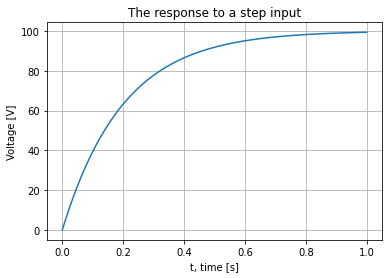

In [4]:
# previously for the sin source, we used the residues and poles to calculate the time dependent voltage
# This time we will create an lti object
# you can use either method for both the step response and the sin reponse as long as you find V(s)
num = [500]
den = [1, 5, 0] # don't forget the zero
V_s = sig.lti(num, den)
t, V_t = V_s.impulse(T=t)
plt.plot(t, V_t)
plt.xlabel('t, time [s]')
plt.ylabel('Voltage [V]')
plt.title('The response to a step input')
plt.grid()

You can see that the steady state DC voltage is 100V. This is easy to verify,  
because when the capacitor stops filling with charge  
all of the input current flows through the resistor, such that $V=IR$  
and $5mA\times20k\Omega=100V$  
  
We can also verify it with the Phasor method  
  
$$V(j\omega) = H(j\omega)\cdot input\;Phasor$$  
for steady state DC, $s=0$ and the Phasor is 5mA 
  
$$V(0) = \left[\frac{100k}{0+5}\right]\cdot 0.005=100$$  
This is telling us that the steady state voltage at a frequency of $s=0$ is 100V